In [1]:
import pandas as pd

In [34]:
df=pd.read_excel('Crop_recommendation.xlsx',na_values=[' ?','?','? '])

In [35]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,0.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,0.000000,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee


In [40]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,49.864091,53.948182,47.000909,25.619655,71.258267,6.470113,102.961693
std,37.032417,32.762253,50.934032,5.061207,22.610532,0.772030,55.109932
min,0.000000,0.000000,0.000000,8.825675,0.000000,3.504752,0.000000
25%,21.000000,29.000000,19.000000,22.770662,60.128680,5.977138,64.236408
50%,36.000000,54.000000,30.000000,25.600337,80.457444,6.425420,94.651497
75%,84.000000,67.000000,48.000000,28.561654,89.935185,6.920651,123.026982
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [36]:
df.isnull().sum()

N               39
P               96
K              141
temperature      1
humidity         1
ph              15
rainfall         0
label            0
dtype: int64

In [37]:
for i in df.columns:
    if df[i].dtypes=='O':
        df[i].fillna(df[i].mode()[0],inplace=True)
    elif df[i].dtypes!='O' and df[i].nunique()<((len(df)/100)*10):
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].median(),inplace=True)

In [38]:
df.dtypes

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [39]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [45]:
df['rainfall'].unique()

array([202.9355362, 226.6555374, 263.9642476, ..., 173.3228386,
       127.1752928, 140.9370415])

In [46]:
from sklearn.preprocessing import LabelEncoder

In [49]:
lb=LabelEncoder()

In [51]:
df['crop_encode']=lb.fit_transform(df['label'])

In [54]:
df.drop('label',axis=1).corr()

,N,P,K,temperature,humidity,ph,rainfall,crop_encode
N,1.000000,-0.227916,-0.146963,0.025893,0.176411,0.097541,0.042314,-0.036720
P,-0.227916,1.000000,0.727965,-0.123622,-0.111427,-0.134590,-0.070582,-0.478690
K,-0.146963,0.727965,1.000000,-0.164533,0.174816,-0.165024,-0.059494,-0.349745
temperature,0.025893,-0.123622,-0.164533,1.000000,0.199903,-0.020180,-0.026888,0.113503
humidity,0.176411,-0.111427,0.174816,0.199903,1.000000,-0.003670,0.088600,0.197384
ph,0.097541,-0.134590,-0.165024,-0.020180,-0.003670,1.000000,-0.109440,-0.015582
rainfall,0.042314,-0.070582,-0.059494,-0.026888,0.088600,-0.109440,1.000000,0.042314
crop_encode,-0.036720,-0.478690,-0.349745,0.113503,0.197384,-0.015582,0.042314,1.000000


<Axes: >

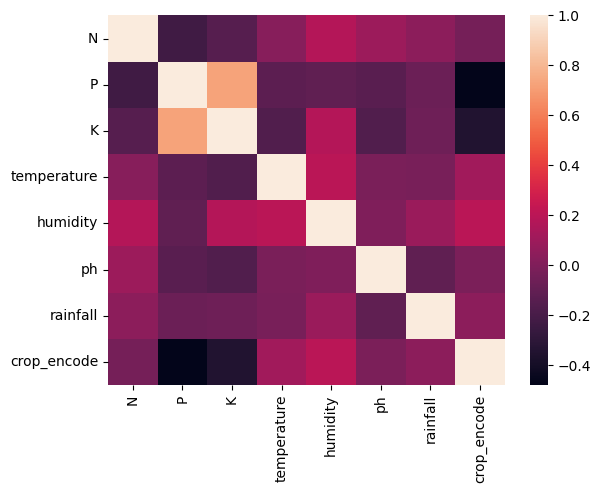

In [58]:
sns.heatmap(df.drop('label',axis=1).corr())

In [57]:
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [61]:
X=df.drop(['label','crop_encode'],axis=1)

In [77]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,0.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,0.000000
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293


In [62]:
y=df['crop_encode']

In [78]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: crop_encode, Length: 2200, dtype: int32

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2529)

In [71]:
lg=LogisticRegression()

In [72]:
lg.fit(X_test,y_test)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
lg.score(X_train,y_train)

0.8848484848484849

In [74]:
lg.score(X_test,y_test)

0.9363636363636364

In [75]:
import pickle

In [76]:
#file_handling/we are saving the model file
with open('model.pkl','wb') as model_file:
    pickle.dump(lg,model_file)